In [ ]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator


In [ ]:
# Define the input shape
input_shape = (150, 150, 3)

# Define the number of classes
num_classes = 4

In [ ]:
# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define the paths to the training and test data
train_data_path = '/kaggle/input/brain-tumor-mri-dataset/Training'
test_data_path = '/kaggle/input/brain-tumor-mri-dataset/Testing'

# Create the generators
train_generator = train_datagen.flow_from_directory(train_data_path, 
                                                    target_size=input_shape[:2], 
                                                    batch_size=32, 
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_path, 
                                                  target_size=input_shape[:2], 
                                                  batch_size=32, 
                                                  class_mode='categorical')

In [ ]:
# Define the ResNet model
resnet_model = tf.keras.applications.ResNet101(include_top=False, 
                                              weights='imagenet', 
                                              input_shape=input_shape)  

In [ ]:
# Add the classification layers on top of ResNet
classifier = keras.Sequential()
classifier.add(resnet_model)
classifier.add(layers.Flatten())
classifier.add(layers.Dense(256, activation='relu'))
classifier.add(layers.Dropout(0.5))
classifier.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = classifier.fit(train_generator, 
                         steps_per_epoch=train_generator.samples // train_generator.batch_size, 
                         epochs=50, 
                         validation_data=test_generator, 
                         validation_steps=test_generator.samples // test_generator.batch_size)

In [ ]:
classifier.save('/kaggle/working/Classifier.h5')

In [ ]:
# Evaluate the model
score = classifier.evaluate(test_generator, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

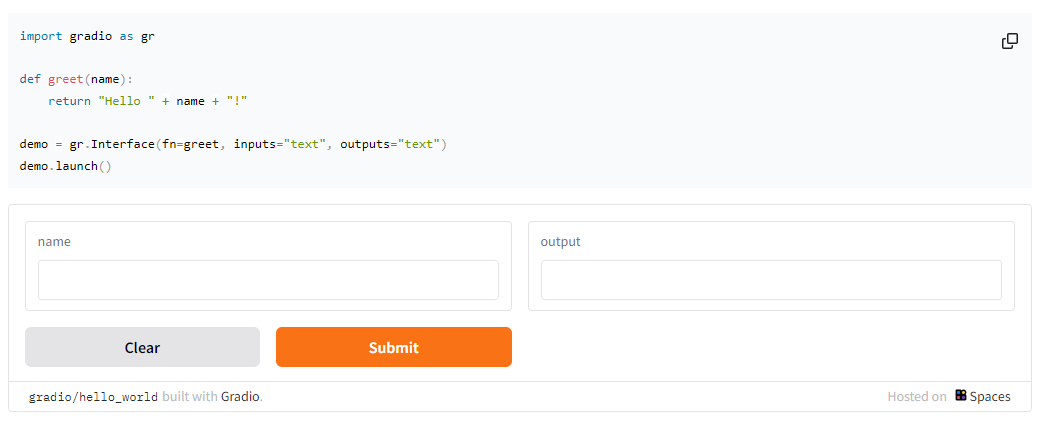

!pip install gradio

In [1]:
!pip install gradio

                                              0.0/56.7 MB ? eta -:--:--
                                              0.1/56.7 MB 2.3 MB/s eta 0:00:25
                                              0.1/56.7 MB 1.8 MB/s eta 0:00:32
                                              0.1/56.7 MB 1.8 MB/s eta 0:00:32
                                              0.1/56.7 MB 1.8 MB/s eta 0:00:32
                                              0.1/56.7 MB 1.8 MB/s eta 0:00:32
                                              0.1/56.7 MB 1.8 MB/s eta 0:00:32
                                             0.2/56.7 MB 546.6 kB/s eta 0:01:44
                                             0.2/56.7 MB 513.4 kB/s eta 0:01:51
                                             0.2/56.7 MB 513.4 kB/s eta 0:01:51
                                             0.2/56.7 MB 429.5 kB/s eta 0:02:12
                                             0.2/56.7 MB 459.5 kB/s eta 0:02:03
                                             0.3/56.7 

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    gradio from https://files.pythonhosted.org/packages/a5/ba/18ad189474e730baa47697c55afd4ab7c0d19d429232f7b8f771f3fd76d5/gradio-5.4.0-py3-none-any.whl:
        Expected sha256 e229e2a35f58010b208efabb56af5f4385813cf3f2845f7f0bc39819ff952fab
             Got        a0a37df087ef62b9a77df24035d9cca3941531b11cbdd29c02ec606b17ef8084



!pip install gradio
